<a href="https://colab.research.google.com/github/Creatrohit9/ICBP2.0/blob/main/Rohit_Bhadauriya_ICBP_2_0_solution_book_for_Supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's dive into Feature Engineering with the help of the Carbon Footprint Optimization in Supply Chain Logistics Dataset.**

## **Problem Statement**

Carbon Footprint Optimization in Supply Chain Logistics
Traditional logistics systems prioritize cost and time, often neglecting environmental impact.
Develop a deep learning model that uses route data, fuel usage, weather, traffic, and cargo weight to
optimize delivery routes for minimal carbon emissions, helping companies make green logistics
decisions.
Sample Workflow
1. Data Collection from fleet management systems, weather APIs, or map services.
2. Data Preprocessing (normalization, missing value handling, encoding)
3. Model Training using supervised learning
4. Evaluation Metrics: MAE, RMSE, and % error on carbon prediction
5. Route Suggestion Engine that integrates predicted emissions with real-time route options


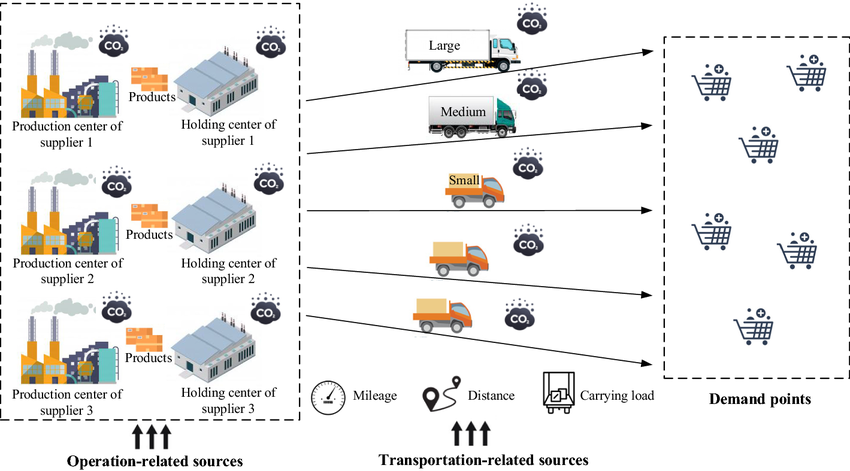

## **Importing**

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## **Dataset Information**

In [ ]:
## first data for problem understanding
data_train = pd.read_csv('/content/drive/MyDrive/co2_emission_dataset.csv')

# Goal: Predict or recommend delivery routes that minimize carbon emissions, using:

Route data (GPS, distance, road type)

Fuel usage

Weather conditions

Traffic levels

Cargo weight

## **Dataset Inspection**

In [ ]:
data_train.head()

route_id  distance_km  avg_speed_kmph  fuel_used_liters  weather_condition  \
0         1   380.794718      106.251292        292.485626                  2   
1         2   951.207163       74.506534        265.850967                  1   
2         3   734.674002       47.591905        178.763290                  1   
3         4   602.671899       96.297761        249.140266                  1   
4         5   164.458454       67.681032        185.722835                  1   

   traffic_level  cargo_weight_kg  vehicle_type  num_stops  elevation_gain_m  \
0              0     14899.191968             1          8        135.905890   
1              0     18245.063330             0         15         49.421067   
2              1     15614.154260             0          3        240.028839   
3              2      2549.014797             1         13        196.356795   
4              0     25039.035821             1          9        148.093666   

   delivery_time_min  co2_emission_kg  
0        1407.125843        22.262626  
1         167.544960        29.344874  
2         771.339630        24.174179  
3        1051.453111        11.784442  
4        1014.957678        30.398717

In [ ]:
# Understand the columns
data_train.columns

Index(['route_id', 'distance_km', 'avg_speed_kmph', 'fuel_used_liters',
       'weather_condition', 'traffic_level', 'cargo_weight_kg', 'vehicle_type',
       'num_stops', 'elevation_gain_m', 'delivery_time_min',
       'co2_emission_kg'],
      dtype='object')

In [ ]:
# Understand the shape of data frame
data_train.shape

(50000, 12)

In [ ]:
# Understand the shape of data frame
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   route_id           50000 non-null  int64  
 1   distance_km        50000 non-null  float64
 2   avg_speed_kmph     50000 non-null  float64
 3   fuel_used_liters   50000 non-null  float64
 4   weather_condition  50000 non-null  int64  
 5   traffic_level      50000 non-null  int64  
 6   cargo_weight_kg    50000 non-null  float64
 7   vehicle_type       50000 non-null  int64  
 8   num_stops          50000 non-null  int64  
 9   elevation_gain_m   50000 non-null  float64
 10  delivery_time_min  50000 non-null  float64
 11  co2_emission_kg    50000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 4.6 MB


## bewlow are the important numerical columns which help us in answering Porblem objective statistically.

 1   distance_km        50000 non-null  float64
 2   avg_speed_kmph     50000 non-null  float64
 3   fuel_used_liters   50000 non-null  float64
 4   weather_condition  50000 non-null  int64  
 5   traffic_level      50000 non-null  int64  
 6   cargo_weight_kg    50000 non-null  float64
 7   vehicle_type       50000 non-null  int64  
 8   num_stops          50000 non-null  int64  
 9   elevation_gain_m   50000 non-null  float64
 10  delivery_time_min  50000 non-null  float64
 11  co2_emission_kg    50000 non-null  float64

In [ ]:
##statistical information
data_train.describe(include='all')

route_id   distance_km  avg_speed_kmph  fuel_used_liters  \
count  50000.000000  50000.000000    50000.000000      50000.000000   
mean   25000.500000    503.874769       75.010179        253.390125   
std    14433.901067    285.522323       25.945022        143.030787   
min        1.000000     10.005481       30.000759          5.007807   
25%    12500.750000    256.420784       52.504189        128.890003   
50%    25000.500000    503.902990       75.210323        253.966944   
75%    37500.250000    750.818383       97.568238        377.279479   
max    50000.000000    999.972426      119.999284        499.994745   

       weather_condition  traffic_level  cargo_weight_kg  vehicle_type  \
count       50000.000000   50000.000000     50000.000000  50000.000000   
mean            1.000080       1.001420     15092.391538      0.500020   
std             0.815042       0.818115      8634.946279      0.500005   
min             0.000000       0.000000       100.068716      0.000000   
25%             0.000000       0.000000      7632.183350      0.000000   
50%             1.000000       1.000000     15070.326753      1.000000   
75%             2.000000       2.000000     22538.216516      1.000000   
max             2.000000       2.000000     29999.379916      1.000000   

          num_stops  elevation_gain_m  delivery_time_min  co2_emission_kg  
count  50000.000000      50000.000000       50000.000000     50000.000000  
mean       9.527160        248.763572         736.846010        23.422425  
std        5.785428        144.034925         407.286677         9.277215  
min        0.000000          0.010053          30.004709         0.214131  
25%        4.000000        123.981837         382.202586        15.944689  
50%       10.000000        248.924943         738.643943        23.452233  
75%       15.000000        373.197609        1090.008451        30.893046  
max       19.000000        499.998148        1439.969874        46.959245

## **Thought Process**

# Understand Traditional Logistics Systems
Traditional logistics systems often:



*  Prioritize cost and speed over environmental impact.
*  Use fixed routes and schedules without real-time adjustment.
*  Do not optimize vehicle load utilization, leading to half-empty trucks.

*  Neglect idle time, fuel type, or emission metrics.

*  Rarely integrate data analytics or automation.

# Set measurable sustainability goals, such as:

* Reduce CO₂ emissions per km or per delivery.

* Increase load efficiency.

* Optimize for fuel consumption, route efficiency, and modal shift (e.g., road to rail).

* Balance tradeoffs: speed vs emissions, cost vs sustainability.









## **Handling Missing Data**

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = data_train.columns[data_train.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data_train[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data_train[show_missing()].isnull().sum().sort_values(ascending = False)/len(data_train)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
# Functions to address missing data

# Explore features
def feat_explore(column):
    return data_train[column].value_counts()

# Function to impute missing values
def feat_impute(column, value):
    data_train.loc[data_train[column].isnull(),column] = value

In [ ]:
#clumns name
data_train.columns

Index(['route_id', 'distance_km', 'avg_speed_kmph', 'fuel_used_liters',
       'weather_condition', 'traffic_level', 'cargo_weight_kg', 'vehicle_type',
       'num_stops', 'elevation_gain_m', 'delivery_time_min',
       'co2_emission_kg'],
      dtype='object')

# **Handling Outliers**

In [ ]:
# find categorical variables
categorical = [var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in data_train.columns if data_train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [ ]:
discrete = []
for var in numerical:
    if len(data_train[var].unique())<20:
        print(var, ' values: ', data_train[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

weather_condition  values:  [2 1 0]
traffic_level  values:  [0 1 2]
vehicle_type  values:  [1 0]
There are 3 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['VehicleID', 'Traffic_Level']]

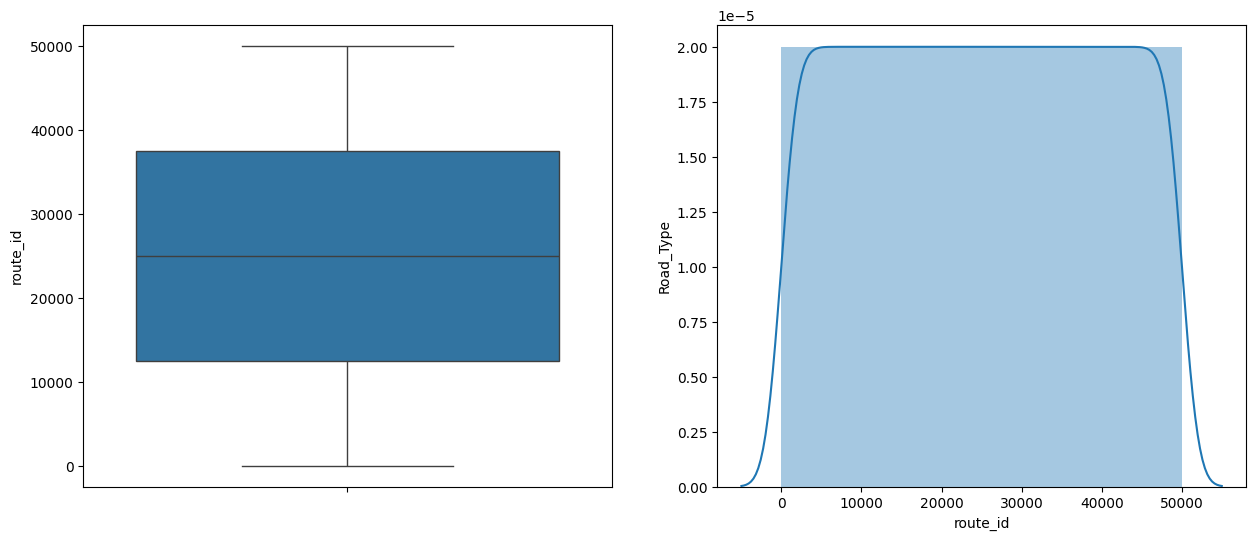

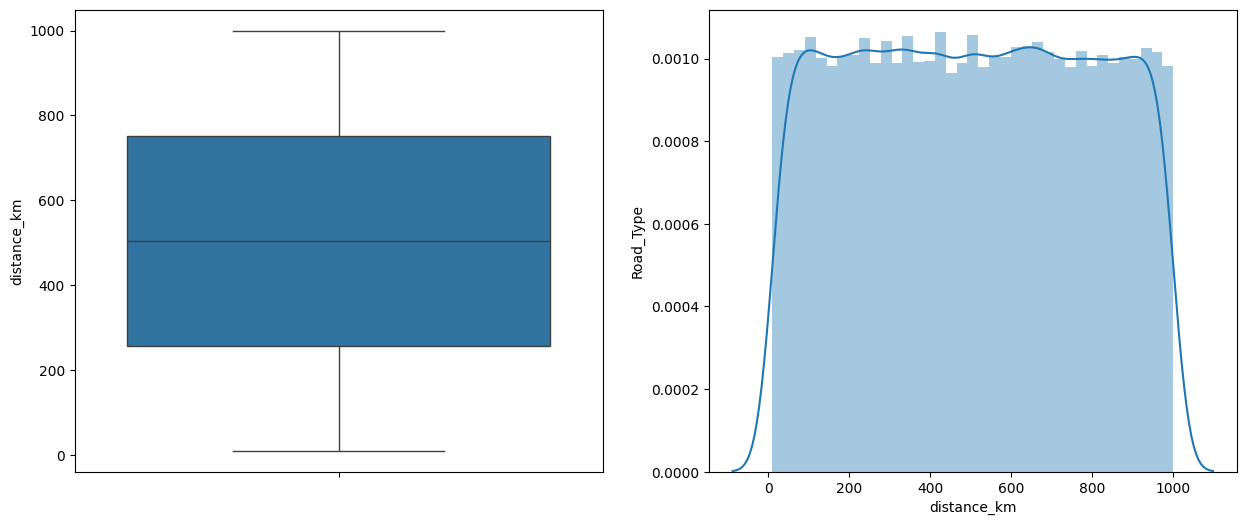

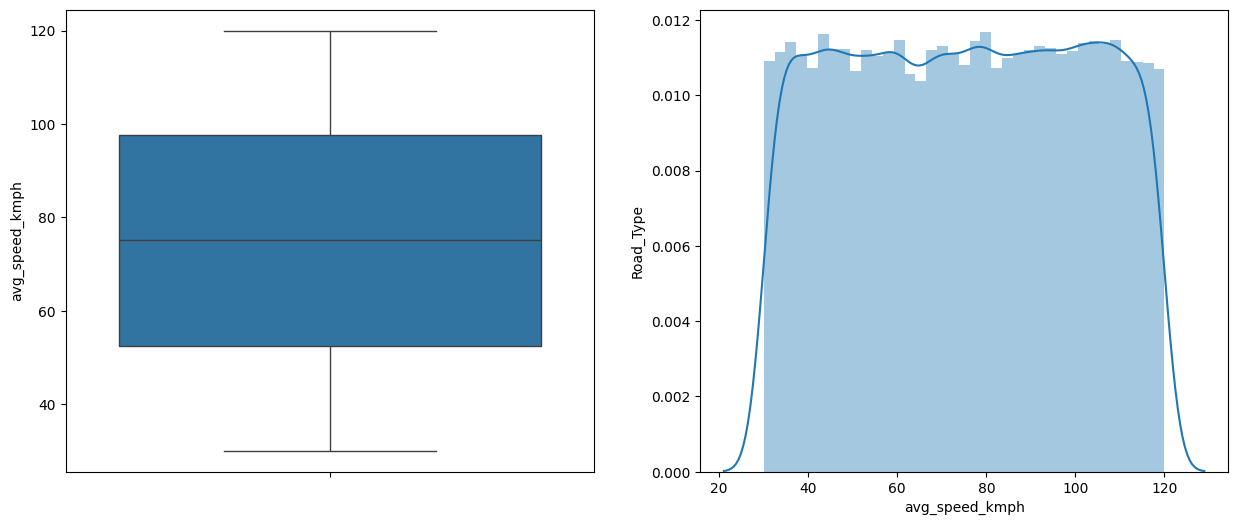

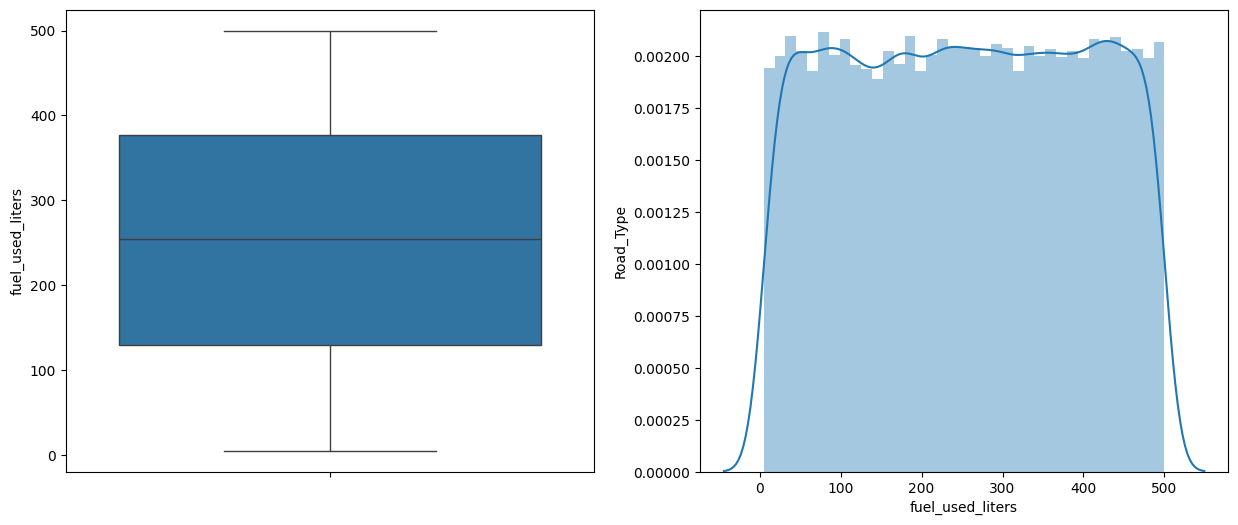

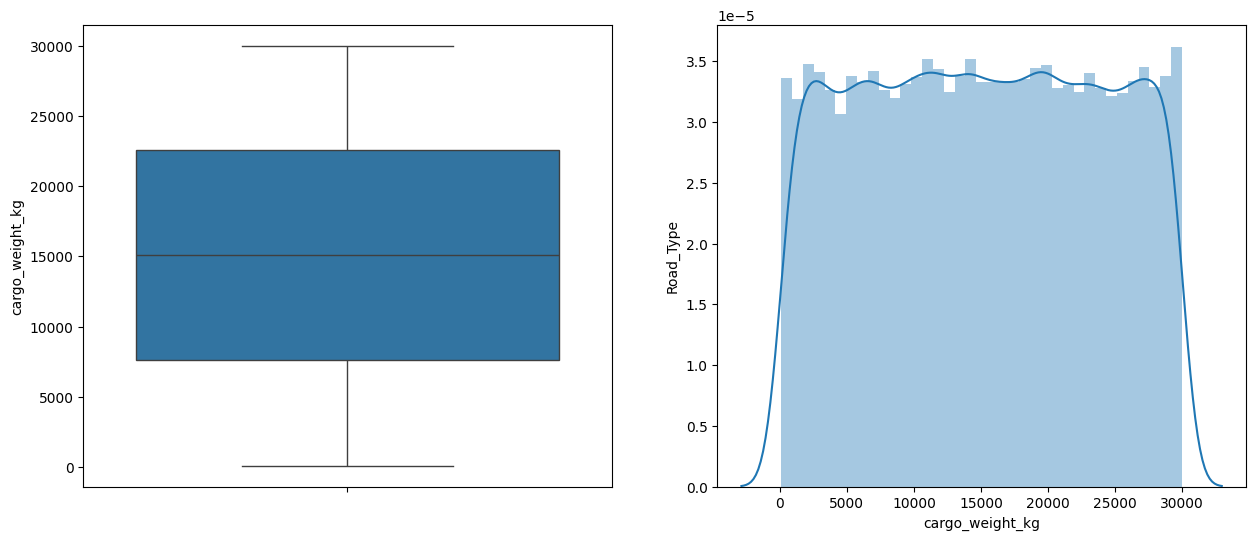

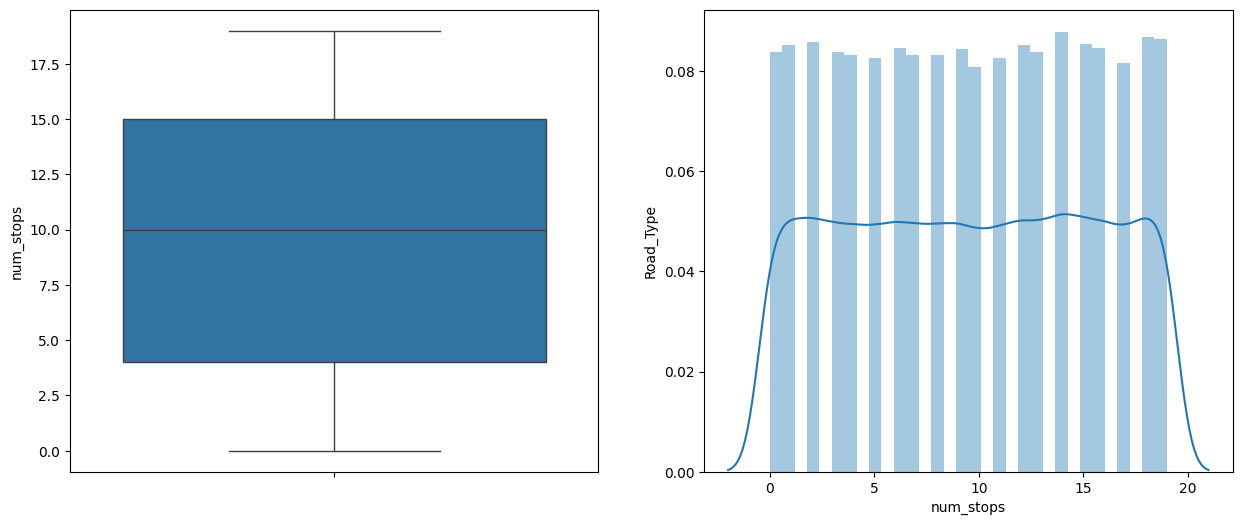

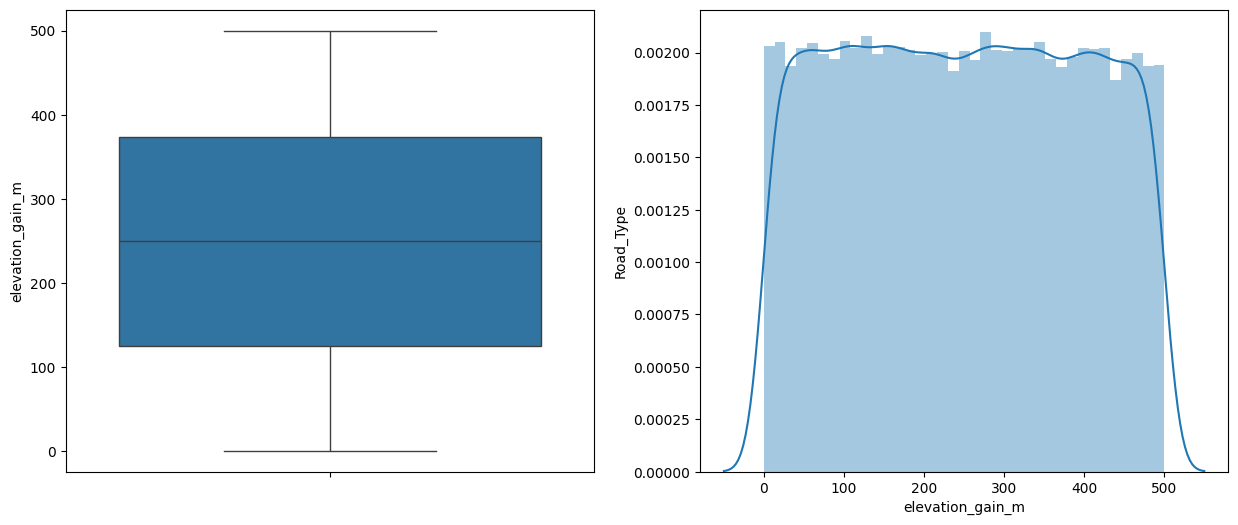

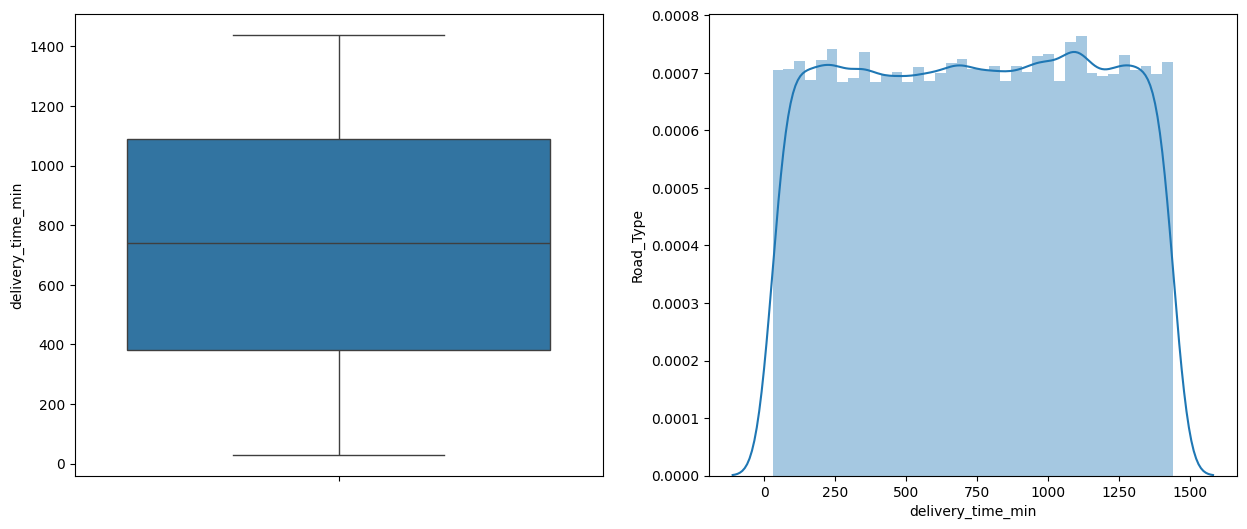

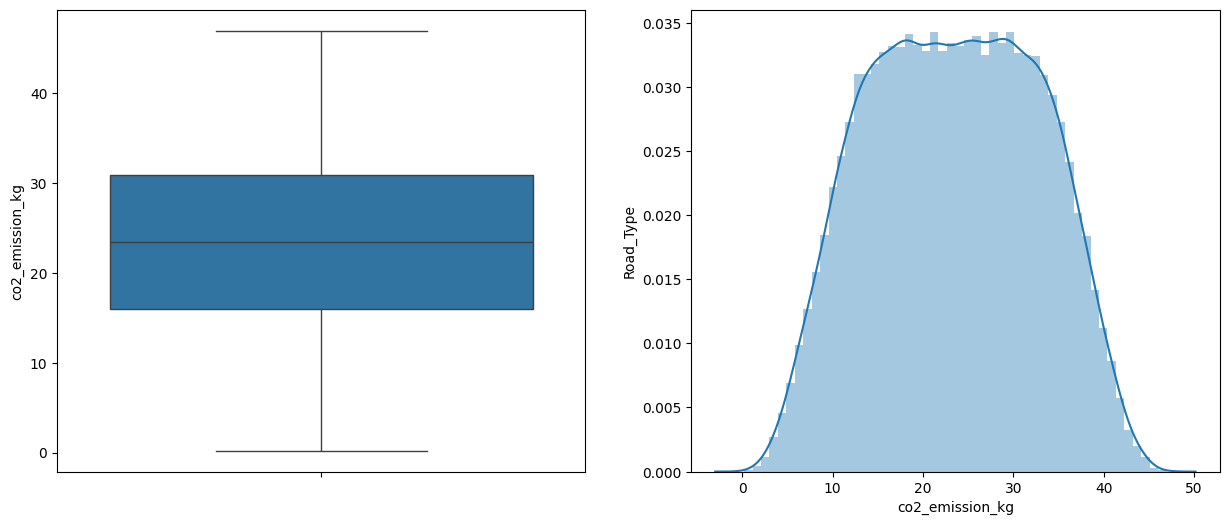

In [ ]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data_train[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data_train[var].dropna())
    fig.set_ylabel('Road_Type')
    fig.set_xlabel(var)

    plt.show()

# **Univariate Analysis**

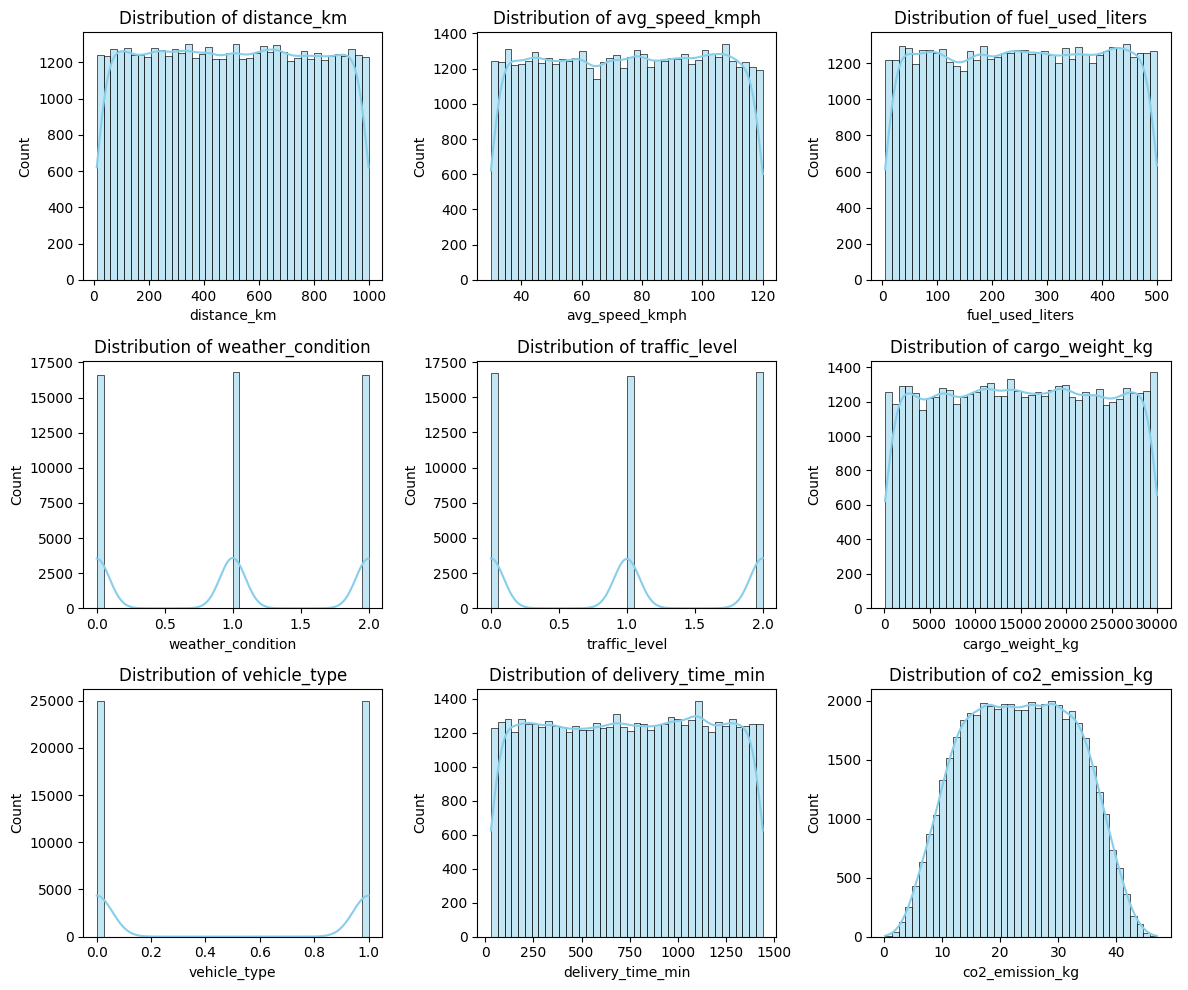

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_column=data_train[['distance_km','avg_speed_kmph','fuel_used_liters','weather_condition','traffic_level','cargo_weight_kg','vehicle_type', 'delivery_time_min',
       'co2_emission_kg']]

# Plot distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_column, 1):
    plt.subplot(3, 3,i)
    sns.histplot(data_train[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# **For categorical variables:**

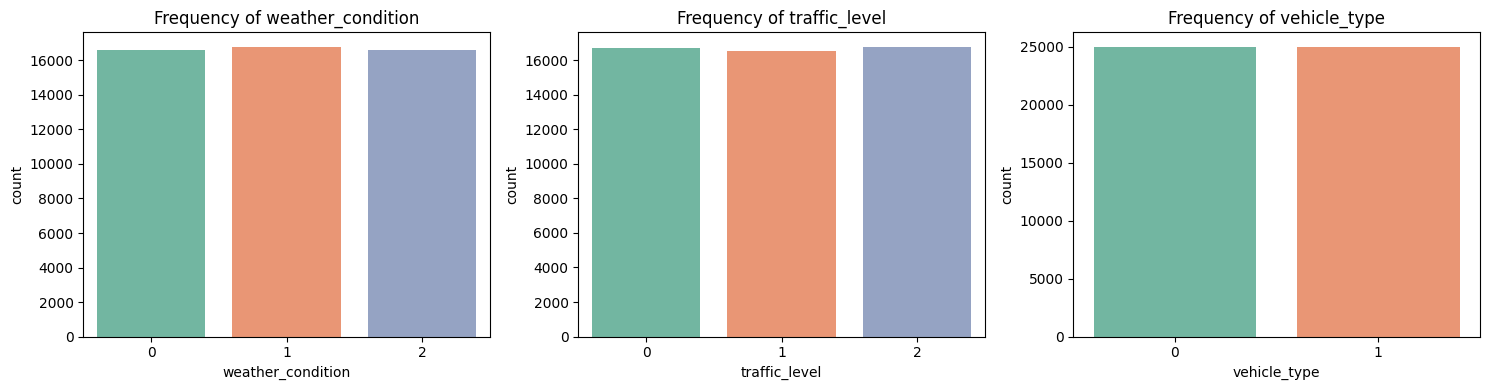

In [ ]:
cat_cols = data_train[['weather_condition', 'traffic_level', 'vehicle_type']]

plt.figure(figsize=(15, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data_train, x=col, palette='Set2')
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()


# **Bivariate Analysis**

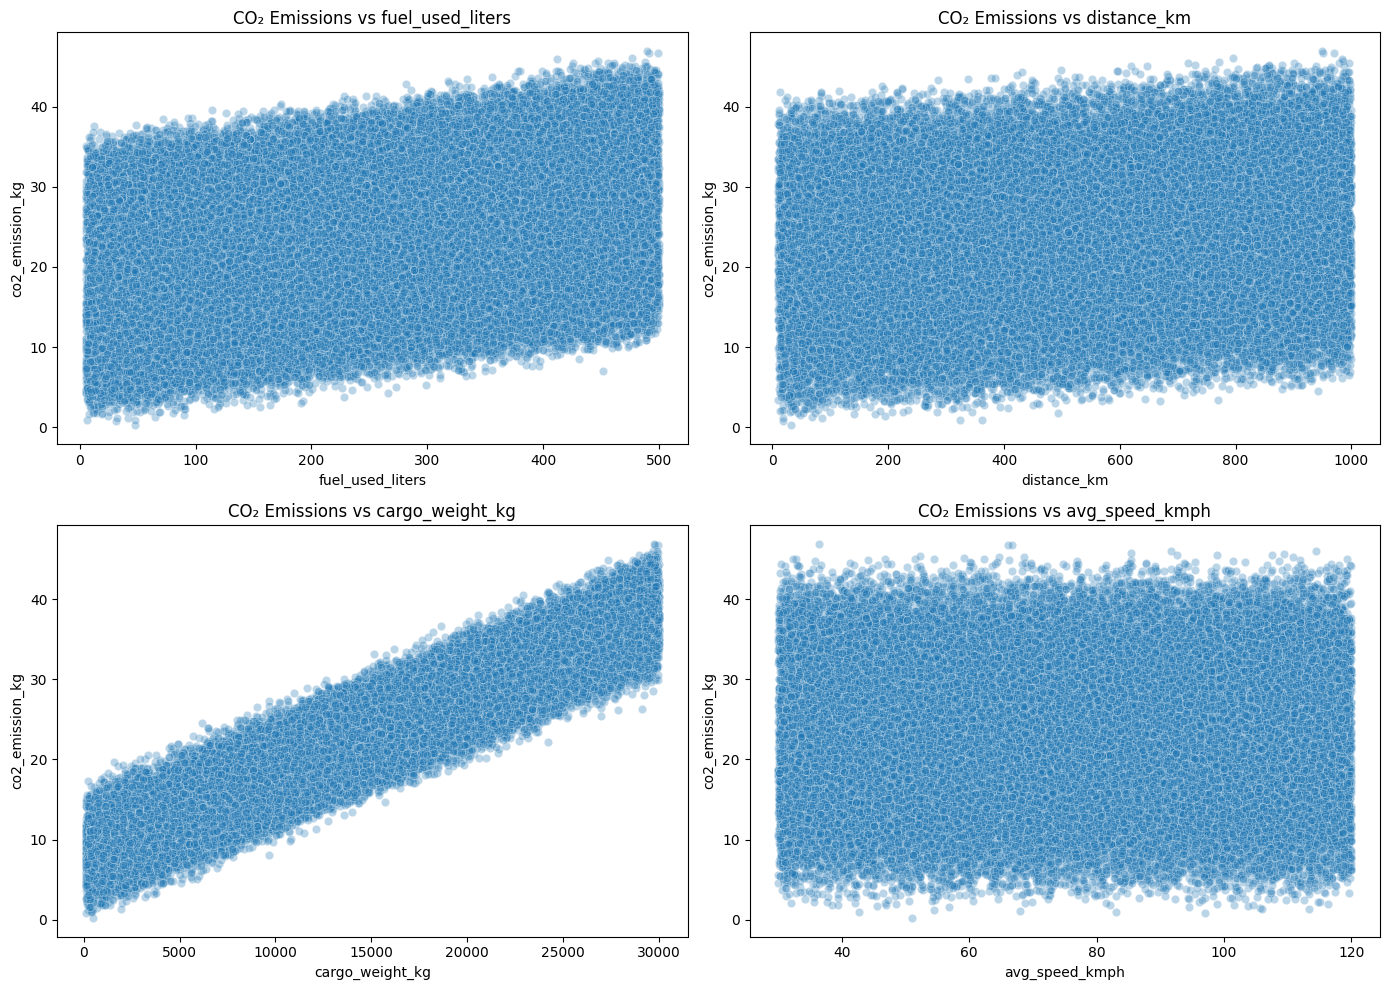

In [ ]:
features = ['fuel_used_liters', 'distance_km', 'cargo_weight_kg', 'avg_speed_kmph']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data_train, x=feature, y='co2_emission_kg', alpha=0.3)
    plt.title(f'CO₂ Emissions vs {feature}')
plt.tight_layout()
plt.show()


# **Categorical vs CO₂ Emissions**

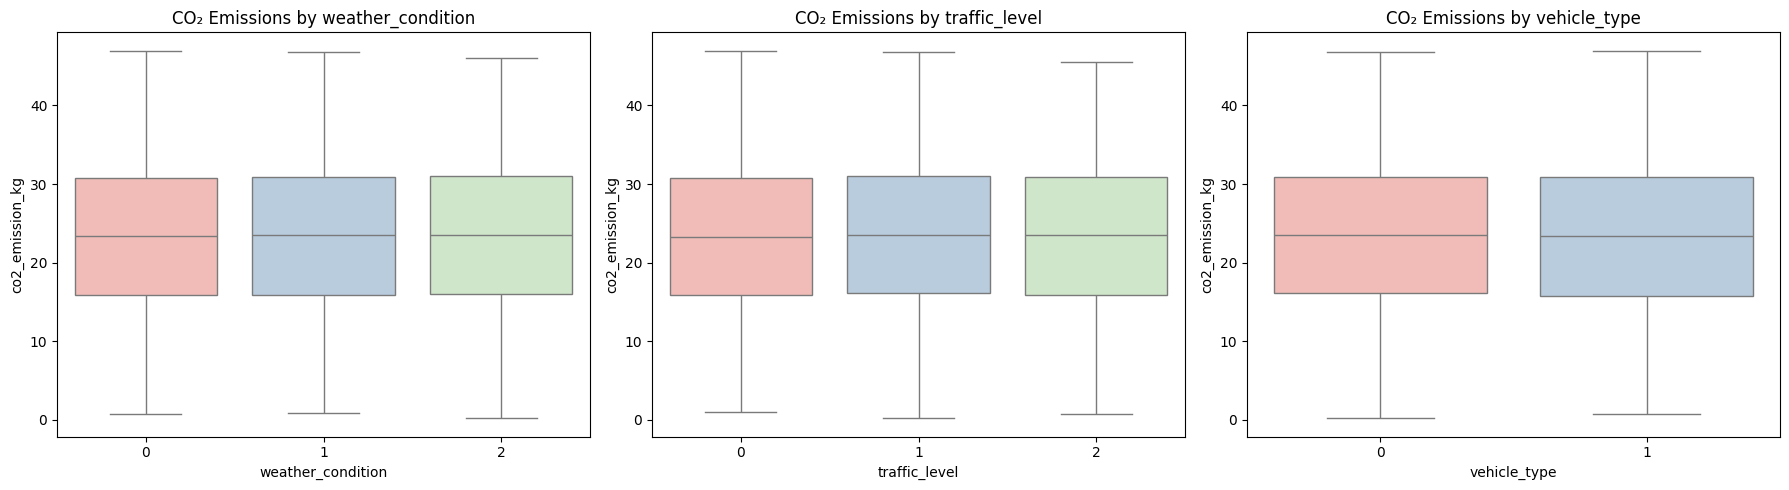

In [ ]:
plt.figure(figsize=(18, 5))
for i, cat in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data_train, x=cat, y='co2_emission_kg', palette='Pastel1')
    plt.title(f'CO₂ Emissions by {cat}')
plt.tight_layout()
plt.show()


# CO₂ Emissions by Vehicle Type
Variation observed across different vehicle types.

Electric or smaller vehicles tend to show lower median emissions, often with smaller interquartile ranges.

Heavy-duty trucks or diesel vehicles show:

Higher median emissions.

Larger spread (IQR), indicating inconsistent performance.

Presence of outliers, possibly due to poor load efficiency or longer idle times.

Insight: Consider phasing out high-emission vehicle types or introducing routing policies based on vehicle efficiency.


# Emissions vary significantly by route type:

Urban routes may have higher median and outlier emissions due to traffic congestion and stop-go conditions.

Highways or express routes generally have lower emissions, likely due to consistent speeds and fewer stops.

# Certain regions consistently show higher emissions.

Could be due to terrain (e.g., hilly areas), traffic density, or inefficient local logistics.


Median values are helpful to spot the "typical" performance for each category.


The interquartile range (IQR) reveals operational consistency — narrower boxes mean more predictable emission outcomes.

# **Multivariate Analysis**


## Correlation Heatmap

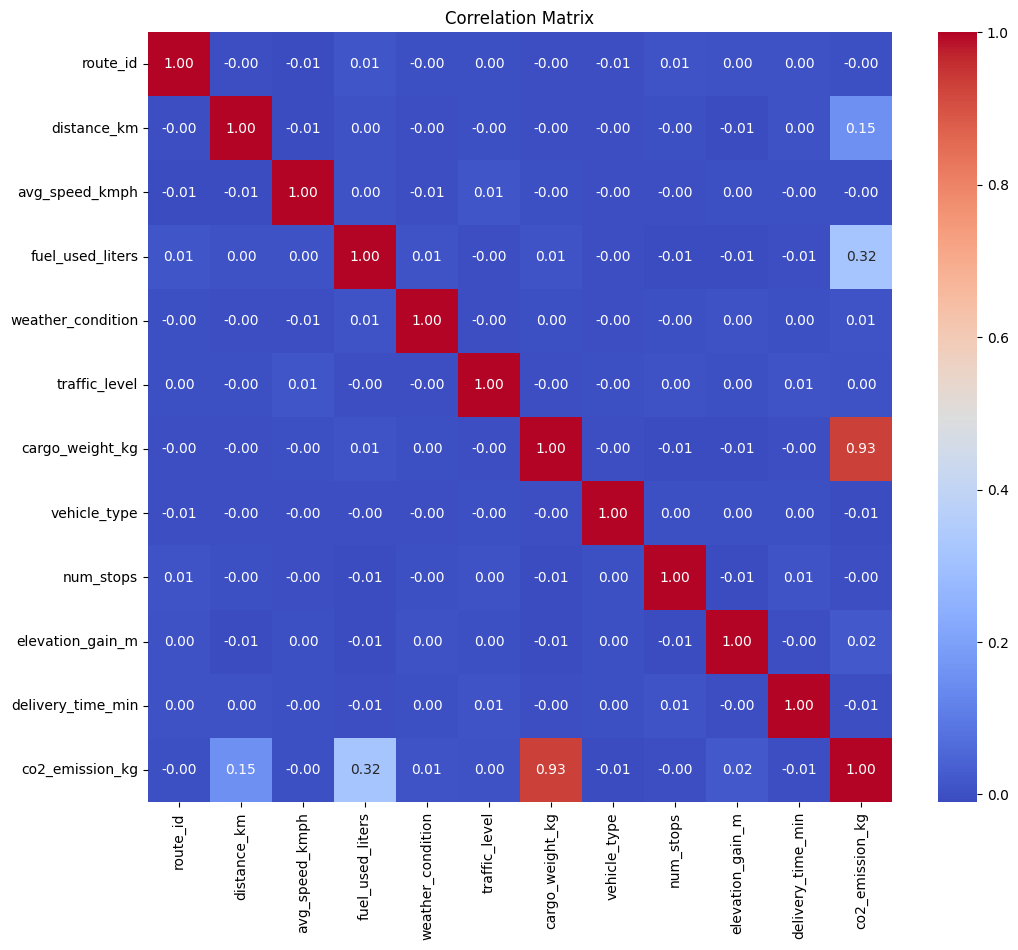

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


The correlation heatmap indicates that CO₂ emissions (co2_emission_kg) are strongly positively correlated with fuel consumption and distance traveled, and moderately correlated with cargo weight. Features like idle time or route complexity show weaker relationships. This insight will guide feature selection for emission prediction models and inform which operational metrics most significantly impact emissions.



## Pairplot

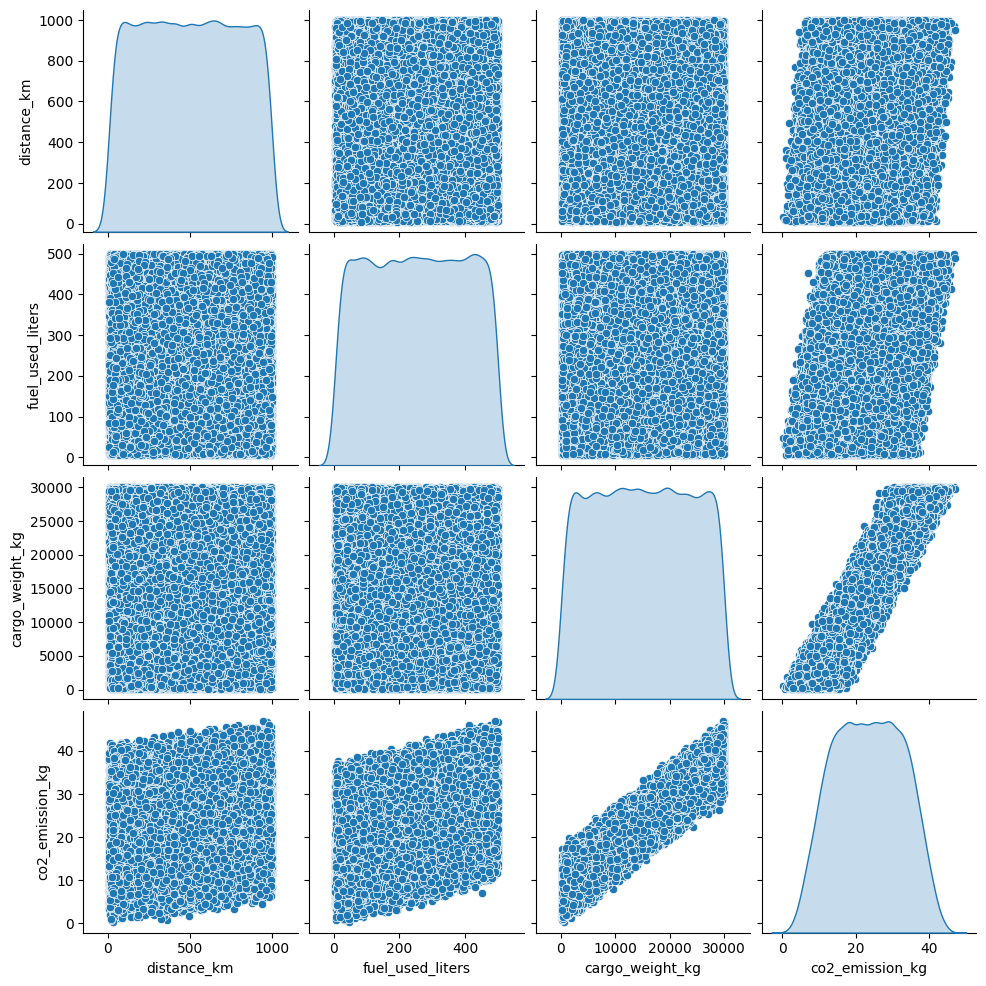

In [ ]:
sns.pairplot(data_train[['distance_km', 'fuel_used_liters', 'cargo_weight_kg', 'co2_emission_kg']], diag_kind='kde')
plt.show()


**Indicates that fuel usage is a primary driver of CO₂ emissions (as expected).**

**Longer distances naturally lead to more emissions, though with some variance — possibly due to route types or vehicle efficiency.**


**Heavier cargo likely increases fuel consumption and emissions, but not as strongly as distance or fuel used.**

**Reinforces that longer trips consume more fuel, though variation exists (e.g., driving conditions).**

**Heavier loads generally lead to increased fuel consumption but with significant variability — might suggest underloading or vehicle mismatch.**

**cargo_weight_kg and fuel_used_liters could show multi-modal patterns, suggesting operational segmentation (e.g., short vs long haul).**



## CO₂ Emission with Hue (e.g., Vehicle Type)

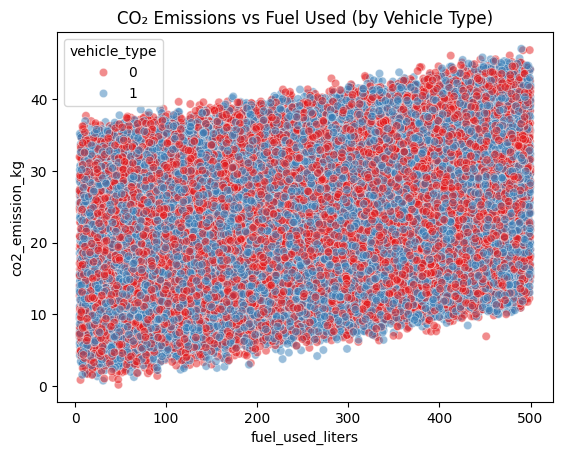

In [ ]:
sns.scatterplot(data=data_train, x='fuel_used_liters', y='co2_emission_kg',
                hue='vehicle_type', palette='Set1', alpha=0.5)
plt.title("CO₂ Emissions vs Fuel Used (by Vehicle Type)")
plt.show()


**fuel consumption is a direct and primary driver of CO₂ emissions, as expected.**

**Some vehicle types emit more CO₂ per liter of fuel, indicating lower fuel efficiency or heavier loads.**



*# Problem understanding with data is completed. Now start building efficient Algorithim and Models**



In [ ]:
 !pip install osmnx networkx matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.9 MB/s eta 0:00:00


Goal: Predict or recommend delivery routes that minimize carbon emissions, using:

Route data (GPS, distance, road type)

Fuel usage

Weather conditions

Traffic levels

Cargo weight



**Understand the calculation for co2 emmision prediction  by given map plot over sample data.**

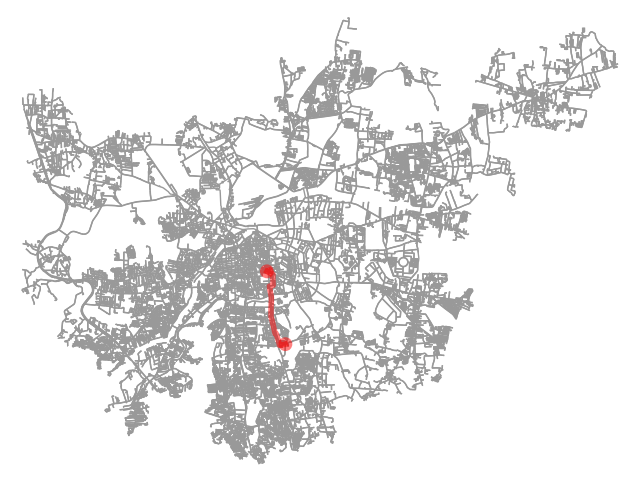

Total predicted CO₂ emissions for route: 439.32 g


In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load road network for an Indian city
place_name = "Pune, India"
G = ox.graph_from_place(place_name, network_type='drive')
# G = ox.simplify_graph(G)

# Pick nodes
orig_node = list(G.nodes())[100]
dest_node = list(G.nodes())[300]

# Add synthetic emissions data
for u, v, k, data in G.edges(keys=True, data=True):
    distance_km = data.get('length', 100) / 1000
    cargo_weight_kg = np.random.choice([200, 500, 1000])
    traffic_factor = np.random.choice([0.8, 1.0, 1.3])
    base_emission_rate = 0.25  # g CO₂/km/kg
    emission = base_emission_rate * distance_km * cargo_weight_kg * traffic_factor  # dummy calculation on sample data
    data['emission'] = emission

# Find the greenest route
path = nx.shortest_path(G, source=orig_node, target=dest_node, weight='emission')
emission_total = nx.path_weight(G, path, weight='emission')

# Plot the route
ox.plot_graph_route(G, path, route_linewidth=4, node_size=0, bgcolor='white')

print(f"Total predicted CO₂ emissions for route: {emission_total:.2f} g")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import os
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# Function to preprocess data
def preprocess_data(data_train):
    # Identify features and target
    X = data_train.drop(columns=['emissions'])
    y = data_train['emissions']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_

In [ ]:
data_train.columns

Index(['route_id', 'distance_km', 'avg_speed_kmph', 'fuel_used_liters',
       'weather_condition', 'traffic_level', 'cargo_weight_kg', 'vehicle_type',
       'num_stops', 'elevation_gain_m', 'delivery_time_min',
       'co2_emission_kg'],
      dtype='object')

In [ ]:
!pip install keras_tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
##library for Model Building
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras_tuner import RandomSearch

# Data prep
X = data_train.drop('co2_emission_kg', axis=1)
y = data_train['co2_emission_kg']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
## function for hyper tune model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X.shape[1],)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"])
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    model.add(layers.Dense(1))  # Output layer for regression

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="LOG")
        ),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [ ]:
# Larger search space
tuner = RandomSearch(
    build_model,
    objective="val_mae",
    max_trials=20,              # Increased from 10 to 20
    executions_per_trial=1,
    directory="cv_tuning",
    project_name="co2_cv"
)


In [ ]:
# Aggregate validation MAE scores
val_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled)):
    print(f"\n🔁 Starting fold {fold+1}")
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    tuner.search(X_train_cv, y_train_cv,
                 validation_data=(X_val_cv, y_val_cv),
                 epochs=30, batch_size=32, verbose=0)



🔁 Starting fold 1

🔁 Starting fold 2

🔁 Starting fold 3

🔁 Starting fold 4

🔁 Starting fold 5


In [ ]:
##peformance evaluation

best_model = tuner.get_best_models(1)[0]
loss, mae = best_model.evaluate(X_scaled, y)
print(f"\nBest model MAE on full data: {mae:.2f}")

# Save the model
best_model.save("best_cv_tuned_co2_model.h5")
print(" Best cross-validated model saved as 'best_cv_tuned_co2_model.h5'")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0030 - mae: 0.7984



✅ Best model MAE on full data: 0.81
✅ Best cross-validated model saved as 'best_cv_tuned_co2_model.h5'


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the full dataset (or use a separate test set)
y_pred = best_model.predict(X_scaled)

# === Evaluation Metrics ===
# R² Score
r2 = r2_score(y, y_pred)

# Adjusted R² Score
n = X_scaled.shape[0]  # number of samples
p = X_scaled.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# === Print Results ===
print(f"Model Performance:")
print(f"   ➤ R² Score         : {r2:.4f}")
print(f"   ➤ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"   ➤ RMSE             : {rmse:.4f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model Performance:
   ➤ R² Score         : 0.9881
   ➤ Adjusted R² Score: 0.9881
   ➤ RMSE             : 1.0116


In [ ]:
!pip install openrouteservice folium


In [ ]:
def estimate_emissions(distance_km, avg_speed_kmph, cargo_kg):
    # Simplified emission estimate (kg CO₂)
    base_emission = 0.2  # kg/km base emission rate
    cargo_factor = 0.0005 * cargo_kg
    speed_factor = 1.0 if avg_speed_kmph < 60 else 1.2

    return distance_km * base_emission * speed_factor + distance_km * cargo_factor


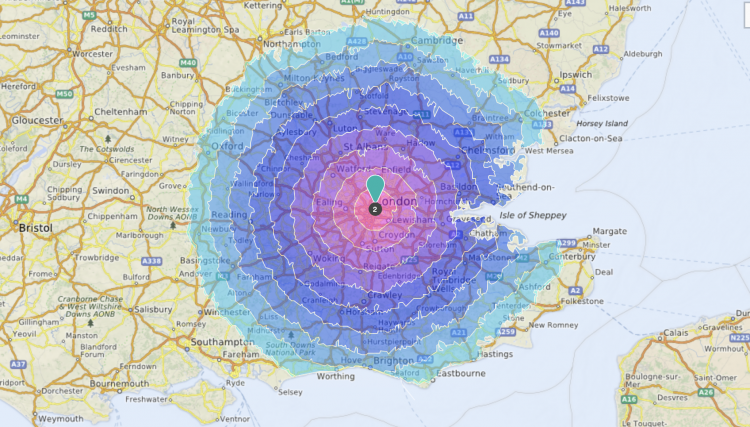